# **Determining the Best Product to Capitalize On — Analyzing Audience Trends and Preferences in "Star Wars"**

In this analysis project, we are going to find what exactly do the fans favor the most about in the "Star Wars" franchise. This includes who are the most favorite characters and which of the movies (Episodes 1-6) are considered to be the best. To also better understand our audience, we will also be looking into whether there's any differences in patterns between respondents who consider themselves fans against those who don't. By being able to better understand what audiences like and what they don't like about the franchise, there can be a more clear and better optimized direction in product marketing to make the most out of investments into the "Star Wars" franchise.

The primary question to dive into is whether fans consider "Star Wars Episode V: The Empire Strikes Back" to be the best across all of the movies. 
We will be:
 - analyzing how many of the respondents have watched each of the movies
 - what each average rating is for each movie is
 - create visualizations of: 
   - who the most and least favorite characters are and who fans are 
   - who the most unfamiliar characters are 
   - which movies the top characters are in, which can also support which movie is also the most favorite

### **Summary of Results** 
By the end of the project we will have found that "Star Wars Episode V: The Empire Strikes Back" is indeed the most popular and highest rated movie, with "Star Wars Episode VI: Return of the Jedi" as a close second. There are many characters making prominant appearances in Episode V — including Han Solo, Yoda, and Luke Skywalker — that are popular favorites. These findings makes the answer clear that fans prefer not just Episode V over all of the movies, but that they also they prefer the Original Trilogy over the Prequel Trilogy overall by a large margin.

---

# **Reading in the Dataset**
In the analysis below, our data will be taken from a survey of 835 total responses by a team at [FiveThirtyEight](https://fivethirtyeight.com/). You can download the survey data at their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) or at [my own repository](https://github.com/willnguyen14/Star-Wars-Survey) for this project.

In [1]:
# read in the data
import pandas as pd
from IPython.display import display

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
# the data set has some characters that aren't in Python's default utf-8 encoding

# initial exploration of the data
print(star_wars.columns)
print("\n")
display(star_wars.head())

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# **What's in the Data?**
We can see immediately that there are many columns names that are ambiguous in their meaning at first glance (e.g. `'Unnamed: 4'`). There are also several cases where a respondent had to give input to several columns to answer a single question. `'RespondentID'` is a unique identifier for each respondent. If any row is missing a value from this column, the row will be deemed as invalid. Hence, we will remove all rows with missing values in the `'RespondentID'` column.

Before we can attempt any type of meanful analysis, we will need to dedicate effort into cleaning much of this dataset.

In [2]:
# 'RespondentID' has missing values, so we will remove all rows with missing 'RespondentID' values
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

---

# **Cleaning and Mapping Yes/No Columns**

In [3]:
# easier to work with True/False Boolean values rather than string "Yes"/"No"
yes_no = {"Yes": True, "No": False}

# column names are long, so they'll be stored into a variable
col_seen = "Have you seen any of the 6 films in the Star Wars franchise?"
col_fan = "Do you consider yourself to be a fan of the Star Wars film franchise?"

star_wars[col_seen] = star_wars[col_seen].map(yes_no)
star_wars[col_fan] = star_wars[col_fan].map(yes_no)

star_wars[[col_seen, col_fan]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


---

# **Cleaning and Mapping Checkbox Columns**
The following six columns are a series of checkbox columns a respondent must check off the question: `"Which of the following Star Wars films have you seen? Please select all that apply."`. In each column, there is only either the name of the movie that they saw, or no response at all, meaning that they haven't seen the movie.

To make these columns easier to work with, we will all of these values into True/False Boolean values and will rename the column names into something more intuitive.

In [4]:
# check the column names
display(star_wars.iloc[:, 3:9].columns)

# rename column corresponding to "Which of the following Star Wars films have you seen?"
star_wars = star_wars.rename(columns = {
    star_wars.columns[3]: "seen_1",
    star_wars.columns[4]: "seen_2",
    star_wars.columns[5]: "seen_3",
    star_wars.columns[6]: "seen_4",
    star_wars.columns[7]: "seen_5",
    star_wars.columns[8]: "seen_6"
})
print("\n")

# make sure that the column name changes are in place
star_wars.iloc[:, 3:9].columns

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [5]:
import numpy as np     # import numpy because we are now dealing with NaN values

# Be careful as there is a double space between the episode number and title for the first four movies
map1 = {
                                            np.NaN: False,
        "Star Wars: Episode I  The Phantom Menace": True,
     "Star Wars: Episode II  Attack of the Clones": True,
     "Star Wars: Episode III  Revenge of the Sith": True,
               "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
        "Star Wars: Episode VI Return of the Jedi": True,
       }

# apply the mapping to the intended columns
for col in star_wars.loc[:, "seen_1":"seen_6"]:
    star_wars[col] = star_wars[col].map(map1)
    
display(star_wars.loc[:, "seen_1":"seen_6"].head())
print('\n')

# check for missing values
star_wars.loc[:, "seen_1":"seen_6"].info()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   seen_1  1186 non-null   bool 
 1   seen_2  1186 non-null   bool 
 2   seen_3  1186 non-null   bool 
 3   seen_4  1186 non-null   bool 
 4   seen_5  1186 non-null   bool 
 5   seen_6  1186 non-null   bool 
dtypes: bool(6)
memory usage: 16.2 KB


---

# **Cleaning the Ranking Columns**
The next six columns are the same case as the last three: a series of checkbox columns in response to the question `"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film."`

These columns will also be renamed into something that is much easier to work with.

In [6]:
# all of the values are numbers that are in string format
display(star_wars.iloc[:, 9:15].info())

# convert all the values into the float dtype for easier computation
star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].astype(float)

# rename the columns into something shorter and more intuitive
star_wars = star_wars.rename(columns = {
                star_wars.columns[9]: "ranking_1",
                star_wars.columns[10]: "ranking_2",
                star_wars.columns[11]: "ranking_3",
                star_wars.columns[12]: "ranking_4",
                star_wars.columns[13]: "ranking_5",
                star_wars.columns[14]: "ranking_6"
                                        })

star_wars.iloc[:, 9:15] = star_wars.iloc[:, 9:15].dropna(axis=0)
print('\n')

star_wars.iloc[:, 9:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                         --------------  ----- 
 0   Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  835 non-null    object
 1   Unnamed: 10                                                                                                                                    836 non-null    object
 2   Unnamed: 11                                                                                                                                    835 non-null    object
 3   Unnamed: 12                       

None



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ranking_1  834 non-null    float64
 1   ranking_2  834 non-null    float64
 2   ranking_3  834 non-null    float64
 3   ranking_4  834 non-null    float64
 4   ranking_5  834 non-null    float64
 5   ranking_6  834 non-null    float64
dtypes: float64(6)
memory usage: 64.9 KB


---

# **What is the Highest-Ranked and Most Viewed Movie?**
To compare both the ranking scores and number of views for each movie, we will take the averages of all the columns and plot them onto bar graphs with matplotlib.

It seems like the more popular the movie is, the higher they ranked it (lower numberic score means higher rank), and as movies have less views, the lower they are ranked. In this case, most people have seen the Original Trilogy (Episodes 4-6) and also favored the trilogy much higher than the Prequels (Episodes 1-3).

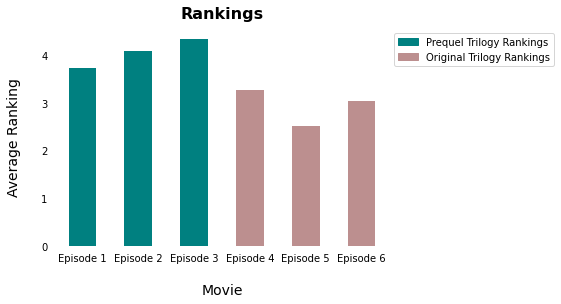

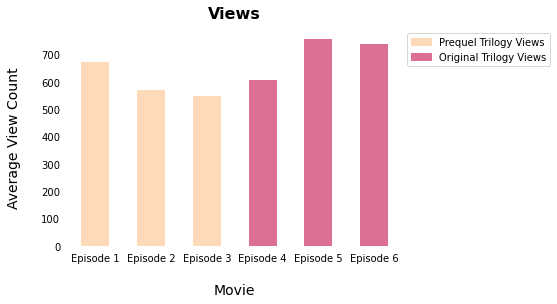

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# mpatches is imported for making customizable legends

%matplotlib inline
# this is to make sure that our plots are actually displayed when we run our code

# create a function to graph the rankings
def ranking(df, title, y_axis):
    df.iloc[:, 9:15].mean().plot.bar(color=['teal', 'teal', 'teal', 
                                            'rosybrown', 'rosybrown', 'rosybrown'])
    
    plt.title(title, fontsize=16, fontweight='bold', pad=10)

    # customize legend with mpatches
    teal_patch = mpatches.Patch(color='teal', label='Prequel Trilogy Rankings')
    rosy_patch = mpatches.Patch(color='rosybrown', label='Original Trilogy Rankings')
    plt.legend(handles=[teal_patch,rosy_patch], loc='upper left', bbox_to_anchor=(1, 1))

    # remove all spines and tick marks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(left=False, bottom=False)
    
    plt.xticks(ticks=[0,1,2,3,4,5], rotation='horizontal',
               labels=['Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6'])
    
    plt.xlabel('Movie', fontsize=14, labelpad=20)
    plt.ylabel(y_axis, fontsize=14, labelpad=20)
    
    plt.show()
    print('\n')
    
# create a function to graph the view counts
def views(df, title, y_axis):
    df.loc[:, "seen_1":"seen_6"].sum().plot.bar(color=['peachpuff', 'peachpuff', 'peachpuff', 
                                                       'palevioletred', 'palevioletred', 'palevioletred'])
    
    plt.title(title, fontsize=16, fontweight='bold', pad=10)

    peach_patch = mpatches.Patch(color='peachpuff', label='Prequel Trilogy Views')
    pale_patch = mpatches.Patch(color='palevioletred', label='Original Trilogy Views')
    plt.legend(handles=[peach_patch, pale_patch], loc='upper left', bbox_to_anchor=(1, 1))

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(left=False, bottom=False)
    
    plt.xticks(ticks=[0,1,2,3,4,5], rotation='horizontal',
               labels=['Episode 1','Episode 2','Episode 3','Episode 4','Episode 5','Episode 6'])
    
    plt.xlabel('Movie', fontsize=14, labelpad=20)
    plt.ylabel(y_axis, fontsize=14, labelpad=20)
    
    plt.show()
    print('\n')
    
# remember that the lower a ranking is, the more favorable that movie
ranking(df=star_wars, title='Rankings', y_axis='Average Ranking')
views(df=star_wars, title='Views', y_axis='Average View Count')

---

# **Is There Any Difference Between Fans and Non-fans?**
One of the questions addressed was "Is there a bias between people who consider themselves fans of the movies against those who don't?"

People who consider themselves fans of a franchise tend to be more knowledgeable or more appreciative of the material of that franchise. While others who consider themselves just as casual viewers don't think much of the material and only take the movies at face value, in contrast, fans already have some sort of personal connection to them.

 - Do fans have a higher bias towards the rating of "The Empire Strikes Back"? 
 - Or is it common across the majority of the respondents to say that "The Empire Strikes Back" is the best of the saga?

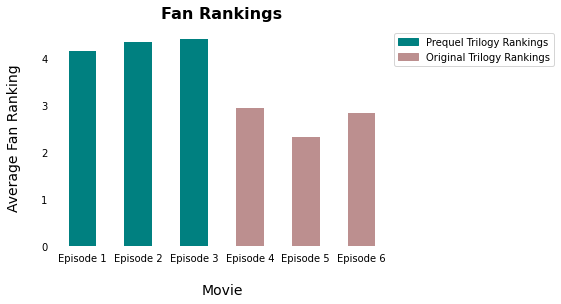

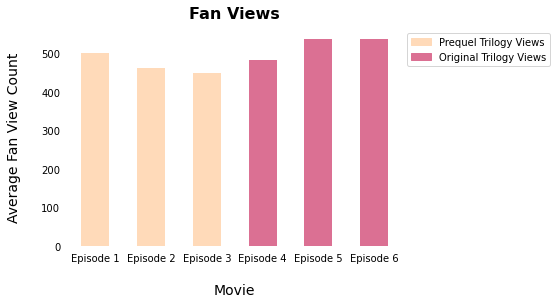

In [8]:
# create two new dataframes based on whether respondents consider themselves as fans or not
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

# highest ranked movie amongst fans
ranking(df=fan, title='Fan Rankings', y_axis='Average Fan Ranking')
# most viewed movie amongst non-fans
views(df=fan, title='Fan Views', y_axis='Average Fan View Count')

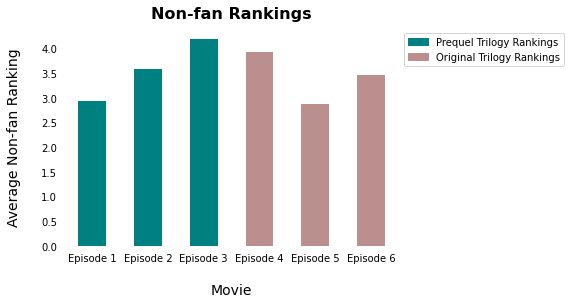

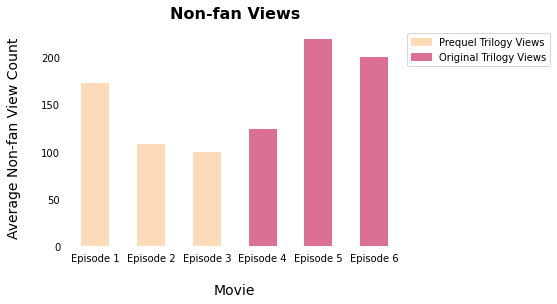

In [9]:
# highest ranked movie amongst non-fans
ranking(df=non_fan, title='Non-fan Rankings', y_axis='Average Non-fan Ranking')
# most viewed movie amongst non-fans
views(df=non_fan, title='Non-fan Views', y_axis='Average Non-fan View Count')

# **Findings: Fans vs. Non-Fans**
Note that the sample sizes between respondents who consider themselves as fans and those who aren't fans are very different. Instead of comparing the count of people who've seen and rated the movies, it would be better to look at the distributions and trends that fans and non-fans have with each movie. This way, we can see if there's a general consensus or not.

**Fans:**
 - most fans have seen all of the movies
 - fans are overwhelmingly in favor of rating the Original Trilogy higher than the Prequels
 - ratings are consistently positive across the Original Trilogy and consistently negative across the Prequels
 
**Non-Fans:**
 - most non-fans have only seen episode 5 and 6
 - episode 1 is the most popular and highest ranked of the Prequels amongst non-fans
 - ratings vary across all movies (interesting how episode 5 is rated almost the same as episode 1)
 
**Commonalities:**
 - both groups of fans have seen "The Empire Strikes Back" the most 
 - both groups of fans have rated "The Empire Strikes Back" the highest 
 - both groups of fans have seen "Revenge of the Sith" (episode 3) the least
 - both groups of fans have rated "Revenge of the Sith" (episode 3) the lowest

---------------------------------------------------------------------------------

# **Finding the Most and Least Popular "Star Wars" Characters**
Another indicator of whether respondents consider "The Empire Strikes Back" as the best is to determine how they favor characters who appeared in the Original Trilogy compared to characters who appears in the Prequels. If the character appeared in both the Prequels and Originals, we will characterize them as characters from both trilogies and see has any influence on the respondents' opinions.

|Original Trilogy Characters| |Both Trilogies| |Prequel Trilogy Characters|
| :----------- | | :----------- | | :----------- |
|Han Solo| |Obi Wan Kenobi| |Anakin Skywalker|
|Luke Skywalker| |Yoda| |Padme Amidala|
|Princess Leia Organa| |Emperor Palpatine| |Jar Jar Binks|
|Lando Calrissian| |Darth Vader|
|Boba Fett| |C-3P0|
| ||R2 D2|

In [10]:
# just like the ranking columns, the following columns are checkbox columns to answer a single question about the characters
display(star_wars.iloc[:, 15:29].columns)

# rename the columns based on the corresponding characters
star_wars = star_wars.rename(columns = {
                star_wars.columns[15]: "Han Solo",
                star_wars.columns[16]: "Luke Skywalker",
                star_wars.columns[17]: "Princess Leia Organa",
                star_wars.columns[18]: "Anakin Skywalker",
                star_wars.columns[19]: "Obi Wan Kenobi",
                star_wars.columns[20]: "Emperor Palpatine",
                star_wars.columns[21]: "Darth Vader",
                star_wars.columns[22]: "Lando Calrissian",
                star_wars.columns[23]: "Boba Fett",
                star_wars.columns[24]: "C-3P0",
                star_wars.columns[25]: "R2 D2",
                star_wars.columns[26]: "Jar Jar Binks",
                star_wars.columns[27]: "Padme Amidala",
                star_wars.columns[28]: "Yoda"
                                        })
print("\n")
star_wars.iloc[:, 15:29].columns

Index(['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')

# **Checking and Dropping Missing Values**
We only care about the respondents' opinions about all the characters and whether they have checked all of the boxes. We can see that all of the character columns have roughly about the same number of non-null values. A new dataframe containing only the columns relating to the question: `"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."` will be created, with all of the missing values dropped.

In [11]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   RespondentID                                                           1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?           1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?  836 non-null    object 
 3   seen_1                                                                 1186 non-null   bool   
 4   seen_2                                                                 1186 non-null   bool   
 5   seen_3                                                                 1186 non-null   bool   
 6   seen_4                                                                 1186 non-null   b

In [12]:
# check for missing values
print(star_wars.iloc[:, 15:29].info())
print("\n")

# create new dataframe of only the characters
characters = star_wars.iloc[:, 15:29]

# drop missing values
characters = characters.dropna(axis=0)
star_wars.iloc[:, 15:29] = characters.dropna(axis=0)

characters.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Han Solo              829 non-null    object
 1   Luke Skywalker        831 non-null    object
 2   Princess Leia Organa  831 non-null    object
 3   Anakin Skywalker      823 non-null    object
 4   Obi Wan Kenobi        825 non-null    object
 5   Emperor Palpatine     814 non-null    object
 6   Darth Vader           826 non-null    object
 7   Lando Calrissian      820 non-null    object
 8   Boba Fett             812 non-null    object
 9   C-3P0                 827 non-null    object
 10  R2 D2                 830 non-null    object
 11  Jar Jar Binks         821 non-null    object
 12  Padme Amidala         814 non-null    object
 13  Yoda                  826 non-null    object
dtypes: object(14)
memory usage: 139.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
Int64

# **We Now Have Clean Data!**
After checking checking the cleanliness of our data one last time, we now have clean data with only the columns we need for this project. There are multiple slices of columns that are still missing values but that shouldn't pose any problem. An important thing to take note is that the count of non-null values for columns `seen_1`-`seen_6` and `Have you seen any of the 6 films in the Star Wars franchise?` are the same as the `RespondentID` column. This means that everyone who has taken the survey had at least done the minimum of sharing whether they have seen the movies or not. The rest of the columns can be assumed to be auxillary. It is safe to say that not every respondent is compelled to answer every single question the survey wants to ask them.

In [13]:
# drop the columns we don't need for this analysis
star_wars = star_wars.iloc[:, 0:29]
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   RespondentID                                                           1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?           1186 non-null   bool   
 2   Do you consider yourself to be a fan of the Star Wars film franchise?  836 non-null    object 
 3   seen_1                                                                 1186 non-null   bool   
 4   seen_2                                                                 1186 non-null   bool   
 5   seen_3                                                                 1186 non-null   bool   
 6   seen_4                                                                 1186 non-null   b

---

# **Using Value Counts to Analyze Every Character's Popularity**

In [14]:
characters['Han Solo'].value_counts()

Very favorably                                 561
Somewhat favorably                             138
Neither favorably nor unfavorably (neutral)     40
Unfamiliar (N/A)                                14
Somewhat unfavorably                             6
Very unfavorably                                 1
Name: Han Solo, dtype: int64

# **Our Approach**
We are only going to care whether the respondants love, hate, or don't know these characters. So, we will only focus on the following columns (the other values will not be able to add much to our analysis):
 - `['Very favorably']`
 - `['Very unfavorably']`
 - `['Unfamiliar (N/A)']`

----

Going through the value counts for all the character columns, we will create 3 new dataframes for how many every character got voted on for each unique value that is significant to us.

In [16]:
fav_dict={}
least_dict={}
unknown_dict={}

# remember that characters = star_wars.iloc[:, 15:29]
# iterate through the extracted character columns
for col in characters.columns:
    # extract the value counts of each column in characters into multiple dataframes
    stats = pd.DataFrame(characters[col].value_counts())
    
    # extract every instance of 'Very favorably', iterating through all of the characters (columns)
    favor = stats.loc['Very favorably', col]
    fav_dict[col] = favor
    
    # create new dictionary with the items newly sorted by values (ascending order)
    fav_dict = dict(sorted(fav_dict.items(), key=lambda item: item[1]))
    # .reset_index() to treat the index as a column, and now the series is a dataframe
    most_favorite = pd.Series(fav_dict).reset_index().rename(columns = {'index': "Characters", 0: 'Most Favorite'})
    
    least = stats.loc['Very unfavorably', col]
    least_dict[col] = least
    least_dict = dict(sorted(least_dict.items(), key=lambda item: item[1]))
    least_favorite = pd.Series(least_dict).reset_index().rename(columns = {'index': "Characters", 0: 'Least Favorite'})
    
    unknown = stats.loc['Unfamiliar (N/A)', col]
    unknown_dict[col] = unknown
    unknown_dict = dict(sorted(unknown_dict.items(), key=lambda item: item[1]))
    least_known = pd.Series(unknown_dict).reset_index().rename(columns = {'index': "Characters", 0: 'Least Known'})

'''
these are 3 separate dataframes but for the sake of readability, 
they will be placed next to each other as if they were all one dataframe
'''
from IPython.core.display import HTML

# accepts a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

tables = [most_favorite, least_favorite, least_known]
multi_table(tables)

,Characters,Most Favorite
0,Jar Jar Binks,101
1,Emperor Palpatine,106
2,Lando Calrissian,130
3,Boba Fett,133
4,Padme Amidala,156
5,Anakin Skywalker,227
6,Darth Vader,286
7,C-3P0,433
8,Luke Skywalker,504
9,Princess Leia Organa,505


# **How Do The Respondants Feel About The Characters?**

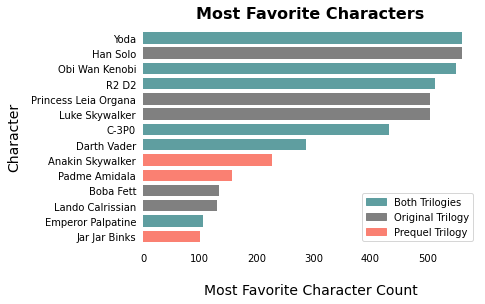

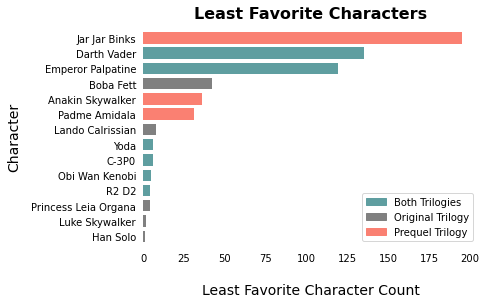

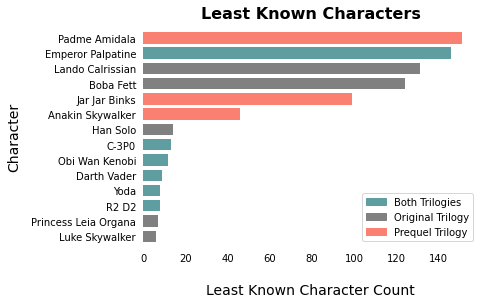

In [17]:
# we're going to need this color map dictionary to assign each label a specific color
map_color = {
                'Han Solo': 'grey',
          'Luke Skywalker': 'grey',
    'Princess Leia Organa': 'grey',
        'Lando Calrissian': 'grey',
               'Boba Fett': 'grey',
          'Obi Wan Kenobi': 'cadetblue',
                    'Yoda': 'cadetblue',
       'Emperor Palpatine': 'cadetblue',
             'Darth Vader': 'cadetblue',
                   'C-3P0': 'cadetblue',
                   'R2 D2': 'cadetblue',
        'Anakin Skywalker': 'salmon',
           'Padme Amidala': 'salmon',
           'Jar Jar Binks': 'salmon'
            }

# loop through a list of the 3 new dataframes
categories = [most_favorite, least_favorite, least_known]

for df in categories:
    # /*replace the values in df['Characters'] with color strings by matching with the corresponding dictionary keys in map_color;
    #   then after replacing the values, turn df['Characters'] into a list of color strings that maintains 
    #   the distinct ordering of all characters of each dataframe to pass into the color parameter*/
    df.plot.barh(x='Characters', y=df.columns[1], color=df['Characters'].replace(map_color).tolist(), width=0.75)
    
    plt.title(df.columns[1] + ' Characters', fontsize=16, fontweight='bold', pad=10)

    # manually set legend colors and labels with mpatches.Patch()
    s_patch = mpatches.Patch(color='salmon', label='Prequel Trilogy')
    g_patch = mpatches.Patch(color='grey', label='Original Trilogy')
    c_patch = mpatches.Patch(color='cadetblue', label='Both Trilogies')

    # pass in patches as a list into handles parameter
    plt.legend(handles=[c_patch, g_patch, s_patch], loc='best')

    # remove all spines and tick marks
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tick_params(left=False, bottom=False)
    
    plt.ylabel('Character', fontsize=14, labelpad=10)
    plt.xlabel(df.columns[1] + ' Character Count', fontsize=14, labelpad=20)

    plt.show()
    print('\n')

# **Findings from Visualizing Popularity of Characters**
Recall which characters are from the Original or Prequel Trilogies:

|Original Trilogy Characters||Both Trilogies| |Prequel Trilogy Characters|
| :----------- | | :----------- | | :----------- |
|Han Solo| |Obi Wan Kenobi| |Anakin Skywalker|
|Luke Skywalker| |Yoda| |Padme Amidala|
|Princess Leia Organa| |Emperor Palpatine| |Jar Jar Binks|
|Lando Calrissian| |Darth Vader|
|Boba Fett| |C-3P0|
| ||R2 D2|

It is quite clear the most of the characters from the Original Trilogy are overwhemingly favorites amongst the respondents. Since top favorites are characters like `Luke Skywalker` and `Han Solo`, we can assume that the respondents have a bias towards choosing "The Empire Strikes Back" as the best movie because their favorite characters are in that movie. 

We can also see that the respondents are unfamiliar with and not in favor of characters from the prequel trilogy, which positively correlates with the low ratings of the Prequels.

---

# **Conclusion**
We have found a sufficient amount of evidence that supports claims from fans the "Star Wars Episode V: The Empire Strikes Back" is the best and the most popular movie of the "Star Wars" saga. Backing up this evidence includes the fact that many of the most popular characters are from the Original Trilogy while the Prequel Trilogy is both not as well known and not as favored.

We went from cleaning all the values and column names of all the columns that we needed, to extracting columns into separate, more specialized dataframes best suited for our needs. From there, we were about to gain significant insights and make evidence supported deductions from multiple visualizations we've created. Our findings support exactly what movies and characters should be promoted and which ones to be more wary of.